<a href="https://colab.research.google.com/github/DRodriguez615/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chisquare

In [355]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/


--2019-11-16 03:56:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 653 [text/html]
Saving to: ‘index.html.7’

index.html.7        100%[===================>]     653  --.-KB/s    in 0s      

2019-11-16 03:56:08 (23.8 MB/s) - ‘index.html.7’ saved [653/653]



In [356]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84 (2).data


In [0]:
# setting column names because column is a row of data
column_names= ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84 (1).data', header= None, names= column_names, na_values='?')

In [358]:
df.head()
print(df.columns)

Index(['party', 'handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')


In [359]:
# convert to numeric so its easier to work with
df = df.replace({'y':1, 'n':0})
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [360]:
# take out null values
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [361]:
# filtering out missing values/nans
col = df['immigration']
np.isnan(col)
immigration_no_nans1 = col[~np.isnan(col)]
immigration_no_nans1.describe()

count    428.000000
mean       0.504673
std        0.500563
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: immigration, dtype: float64

In [0]:
# setting confidence interval to 95%
# want to return the mean, mean-moe, and mean+moe
def confidence_interval(data, confidence=0.95):

    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) 
    return (mean, mean - moe, mean + moe)

In [363]:
# applying function to column with no nans
confidence_interval(immigration_no_nans1)

(0.5046728971962616, 0.45711551746571655, 0.5522302769268067)

In [364]:
confidence_level = .95
dof = 168 -1

stats.t.ppf((1 + confidence_level) / 2, dof)

1.9742709570223844

(0.5046728971962616, 0.45711551746571655, 0.5522302769268067)


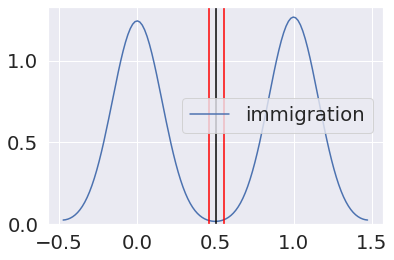

In [365]:
# plotting using column no nans
print(CI)
sns.kdeplot(immigration_no_nans1)
CI = confidence_interval(immigration_no_nans1)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black');

With a confidence interval at 95% we can assume that 'yes' votes on the immigration bill are between 45.7% and 55.2%.
Both parties are on the fence.

chi square test

In [366]:
# reading in the adult data set
f1 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df1.head()

(435, 17)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [367]:
# taking salary and sex columns
# checking out counts
df1['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [368]:
df1['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [370]:
# making a crosstab and assigning it a variable
contingency_table = pd.crosstab(df1['sex'], df1['salary'], margins=True)
contingency_table

salary,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [371]:
# using our table finding female and male counts
# giving our separate counts variable names for easy plotting
femalecount = contingency_table.iloc[0][0:2].values
femalecount

array([9592, 1179])

In [372]:
malecount = contingency_table.iloc[1][0:2].values
malecount

array([15128,  6662])

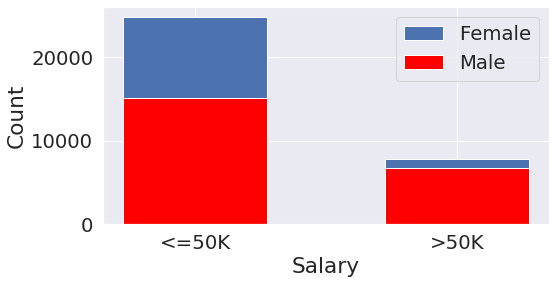

In [373]:
#  plotting using a bar chart
# set categories to whats in our salary column
# plot with our categories, malecount, .55(not sure what this means), and color
# next we set the femalecounts to plot
# set our legend and location[0] for top right corner
# set x and y labels
fig = plt.figure(figsize=(8,4))
sns.set(font_scale=1.8)
categories = ['<=50K', '>50K']
p1 = plt.bar(categories, malecount, .55, color='red')
p2 = plt.bar(categories, femalecount, .55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [374]:
# taking our sums of rows and columns from sex to salary
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[10771 21790]
[24720  7841]


In [375]:
# total count for both male and female
total = contingency_table.loc['All', 'All']
total

32561

In [376]:
# double checking the count is correct
df1.shape[0]

32561

In [377]:
# setting our expected and observed functions
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 2)
[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [378]:
# putting our values from the crosstab into observed variable
observed = pd.crosstab(df1['sex'], df1['salary']).values
print(observed.shape)
observed

(2, 2)


array([[ 9592,  1179],
       [15128,  6662]])

In [379]:
# chi-squared with numpy
chi_squared = ((observed - expected)**2/(expected)).sum()
print(f'Chi-Squared: {chi_squared}')

Chi-Squared: 1518.8868199570722


In [380]:
# getting our degrees of freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f'Degrees of Freedom: {dof}')

Degrees of Freedom: 1


In [385]:
# using scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1517.813409134445
P-value: 0.0
Degrees of Freedom: 1
Expected: 
 [[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)